In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER  
!ls

/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER
 cache			        labels_all_224.np
 cache-2		       'ML Report.gdoc'
 data			        ML-Report-text.gdoc
 data2			       'PCA Variance Graph'
'DISTRACTED DRIVER-CNN.ipynb'   resized_data_64_64_3
'DISTRACTED DRIVER.ipynb'      'Submission-Before midsem'
'Feature Extraction Images'     test
'FINAL IMAGES'		        train
 images_all_224.np


# Import Statement 

In [ ]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 4.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 160kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import joblib
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px  

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from skimage.feature import local_binary_pattern
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#unzipping the zip files and deleting the zip files
# !unzip \*.zip  && rm *.zip

In [ ]:
# !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,kn;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/compressed/imgs.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1603526917&Signature=pyM2GzGEvV6fB5PvFCcWlrd6anKp%2F0b93JEaXcSLE%2FHQPHyutP3MCG0xdKsdHF5NUjyOY94NdNTRWGgeFIKyPxPPj67qzeQAgebgRVznzc490rWZA%2BJ1T6Vc5GvK%2BXhj8FnamNYFm7su4wI7hXr7NlnMtV962TtsBhfPkoDIY1lWXQjG6n7fL0Mq8blHi6Yo%2Fecq9NqAXQeWLW5iOkdOQQ9bgyGYf2hQs%2FqbaW3h0S2ZddhPJVVcMs%2Bubrjwg6bGrgRwM70CS91lNCHWVgChh7HW8sVwdDzlCkJjsBWXSYIy5MlnGJwjUUYyia2EgFyiwOWLWm52etnhOkxKnZyksQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dimgs.zip" -c -O 'imgs.zip'

In [ ]:
# !cd /content/drive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER

# Functions 

## Joblib to save models 

In [ ]:
# Saving and Loading models using joblib 
def save(filename, obj):
  with open(filename, 'wb') as handle:
      joblib.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load(filename):
  with open(filename, 'rb') as handle:
      return joblib.load(filename)


## Save and Load features 

In [ ]:
# functions to save and load the features 
def save_feature(feature, name):
  with open('cache/'+ name  + '.pkl','wb') as handle:
      pickle.dump(csr_matrix(feature), handle, protocol=pickle.HIGHEST_PROTOCOL)
  print(f'Feature saved with name cache/{name}.pkl')

def load_feature(feature_name):
  return pickle.load(open(feature_name, 'rb')).A


## Flatten Image 

In [ ]:
def flattened(images, color=cv2.COLOR_RGB2GRAY, name='flattened', save=False):
    """
    color: default RGB2GRAY, if None is passed then color is used as it is.
    """
    color_images = []
    if color is not None:
        for img in images:
            color_images.append(cv2.cvtColor(img, color))
    else:
        color_images = images
    
    count = len(color_images)
    
    result = np.array(color_images).reshape(count, -1)
    
    if save:
        save_feature(result, name)
        
    return result

## Combine features 

In [ ]:
def combine_features(features, horizontal=True):
  
    if horizontal:
        return np.hstack(features)
    else:
        return np.vstack(features)

## Training using models 

In [ ]:
# def train_model(train_x, train_y, model_name='DT', validation=None):
    """
    Possible model names: ['SVM', 'ADA','KNN','BAG', 'XGB', 'DT']
    default = 'DT'

    validation: (val_x, val_y) tupple for validation accuracy score.

    """
#     model = None
#     if model_name == 'SVM':
#         model = svm.SVC(C=10, kernel='rbf', probability=True)
#     elif model_name == 'XGB':
#         model = XGBClassifier(eta=0.5, max_depth=6)
#     elif model_name == 'KNN':
#         model = KNeighborsClassifier(n_neighbors=5)
#     elif model_name == 'ADA':
#         model = AdaBoostClassifier(n_estimators=200)
#     elif model_name == 'BAG':
#         model = BaggingClassifier(n_estimators=40)
#     else:
#         model = DecisionTreeClassifier(criterion='entropy', max_depth=20)
        
    
#     model.fit(train_x, train_y)
    
#     if validation is not None:
          # target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7',
          #               'class 8', 'class 9', ]
#         y_hat = model.predict(validation[0])
#         class_report = classification_report(validation[1], y_hat, target_names=target_names, output_dict=True)
#         print('Precision =', class_report['macro avg']['precision'])
#         print('Recall = ', class_report['macro avg']['recall'])
#         print('F1-score =', class_report['macro avg']['f1-score'])
#         print('Accuracy =', class_report['accuracy'])
               
#     return model

## Features Extration 

### LBP 

In [ ]:
def get_lbp(images, name='lbp', save=False):
  result = np.array([local_binary_pattern(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 10, 3).flatten() for img in images])
 
  if save:
      save_feature(result, name)
      
  return result

### SURF 

In [ ]:
def get_surf(images, name='surf', save=False):
  # SURF descriptor 
  def get_image_surf(image, vector_size=32):
        alg = cv2.xfeatures2d.SURF_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
  # SURF descriptor for all images
  features = []
  for i, img in enumerate(images):
      dsc = get_image_surf(img)
      features.append(dsc)
  
  result = np.array(features)
  
  if save:
      save_feature(result, name)
      
  return result



In [ ]:
def get_sift(images, name='sift', save=False):
    # SIFT descriptor for 1 image
    def get_image_sift(image, vector_size=32):
        alg = cv2.xfeatures2d.SIFT_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 128
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
    # SIFT descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_sift(img)
        features.append(dsc)

    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result

###Color Histogram###

In [ ]:
def get_color_hist(images, name='color_hist', save=False):
    histograms = []
    for img in images:
        histograms.append(cv2.calcHist([img], [0, 1, 2],None, [8,8,8], [0, 256, 0, 256, 0, 256]).flatten())
    
    result = np.array(histograms)
    
    if save:
        save_feature(result, name)
        
    return result

###KAZE###

In [ ]:
def get_kaze(images, name='kaze', save=False):
    def get_image_kaze(image, vector_size=32):
        alg = cv2.KAZE_create()
        kps = alg.detect(image)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
        return dsc
    
    # KAZE descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_kaze(img)
        features.append(dsc)
    
    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result

## Normalize Features 

In [ ]:
  def norm_features_minmax(train, test):
      min_max_scaler = preprocessing.MinMaxScaler()
      norm_train = min_max_scaler.fit_transform(train)
      norm_test = min_max_scaler.transform(test)
      
      return norm_train, norm_test

In [ ]:
def norm_features_zscore(train, test):
    min_max_scaler = preprocessing.StandardScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_test = min_max_scaler.transform(test)
    
    return norm_train, norm_test

In [ ]:
def norm_features_minmax2(train,val,test):
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_val = min_max_scaler.transform(val)
    norm_test = min_max_scaler.transform(test)
    
    
    return norm_train,norm_val, norm_test 

In [ ]:
def norm_features_zscore2(train,val, test):
    min_max_scaler = preprocessing.StandardScaler()
    norm_train = min_max_scaler.fit_transform(train)
    norm_val = min_max_scaler.transform(val)
    norm_test = min_max_scaler.transform(test)
  
    return norm_train,norm_val,norm_test

# Resize Images 

In [ ]:
# defining global variable path
# Location of my dataset on My Google Drive
images_path = "/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER/train"

In [ ]:
# def read_images(datapath):
#   labels = ['c0', 'c1','c2','c3','c4','c5','c6','c7','c8','c9']
#   mapping = {'c0' : 0, 'c1' :1, 'c2':2, 'c3':3, 'c4':4,'c5':5,'c6':6,'c7':7,'c8':8,'c9':9}
#   images = []
#   Imglabels = []
#   num1 = 224
#   num2 = 224
#   for label in labels:
#       path = os.path.join(datapath , label)
#       for img in os.listdir(path):
#         img = cv2.imread(os.path.join(path,img))
#         new_img = cv2.resize(img, (num2, num1))
#         images.append(new_img)
#         Imglabels.append(mapping[label])
#         # print(images,Imglabels)
#       print(label)
#   return np.array(images), np.array(Imglabels)
   
# full_x , full_y  = read_images(images_path)


c0
c1
c2
c3
c4
c5
c6
c7
c8
c9


In [ ]:
# save("/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER/images_all_224.np", full_x)
# save("/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER/labels_all_224.np", full_y)

In [ ]:
# full_x = load("/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER/images_all_224.np")
# full_y = load("/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER/labels_all_224.np")
# X , X_test , y ,y_test = train_test_split(full_x , full_y , test_size=0.2, random_state=0,stratify = full_y)
# train_imgs , val_imgs , train_y , val_y = train_test_split( X, y ,test_size=0.1, random_state=0,stratify = y) 

# np.save('data2/train_imgs.npy', train_imgs)
# np.save('data2/train_y.npy', train_y)
# np.save('data2/val_imgs.npy', val_imgs)
# np.save('data2/val_y.npy', val_y)

# np.save('data2/X.npy', X)
# np.save('data2/y.npy', y)
# np.save('data2/X_test.npy', X_test)
# np.save('data2/y_test.npy', y_test)

# Main function 

## Read Split and Store data  

In [ ]:
full_x = load("/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER/resized_data_64_64_3/images_all.np")
full_y = load("/content/gdrive/My Drive/SUBJECTS /PROJECTS/ML-DISTRACTED-DRIVER/resized_data_64_64_3/labels_all.np")

In [ ]:
np.shape(full_x)

(22424, 64, 64, 3)

In [ ]:
X , X_test , y ,y_test = train_test_split(full_x , full_y , test_size=0.2, random_state=0,stratify = full_y)

In [ ]:
X.shape  , X_test.shape , y.shape , y_test.shape 

((17939, 64, 64, 3), (4485, 64, 64, 3), (17939,), (4485,))

In [ ]:
pd.DataFrame(y).value_counts()

0    1991
3    1877
4    1861
6    1860
2    1853
5    1849
1    1814
9    1703
7    1602
8    1529
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

0    498
3    469
6    465
4    465
2    464
5    463
1    453
9    426
7    400
8    382
dtype: int64

In [ ]:
train_imgs , val_imgs , train_y , val_y = train_test_split( X, y ,test_size=0.1, random_state=0,stratify = y) 

In [ ]:
train_imgs.shape , val_imgs.shape , train_y.shape , val_y.shape 

((16145, 64, 64, 3), (1794, 64, 64, 3), (16145,), (1794,))

In [ ]:
pd.DataFrame(train_y).value_counts()

0    1792
3    1689
4    1675
6    1674
2    1668
5    1664
1    1632
9    1533
7    1442
8    1376
dtype: int64

In [ ]:
pd.DataFrame(val_y).value_counts()

0    199
3    188
6    186
4    186
5    185
2    185
1    182
9    170
7    160
8    153
dtype: int64

In [ ]:
# np.save('data/train_imgs.npy', train_imgs)
# np.save('data/train_y.npy', train_y)
# np.save('data/val_imgs.npy', val_imgs)
# np.save('data/val_y.npy', val_y)

# np.save('data/X.npy', X)
# np.save('data/y.npy', y)
# np.save('data/X_test.npy', X_test)
# np.save('data/y_test.npy', y_test)

## load 

In [ ]:
train_imgs = np.load('data/train_imgs.npy')
train_y = np.load('data/train_y.npy')
val_imgs = np.load('data/val_imgs.npy')
val_y = np.load('data/val_y.npy')

X = np.load('data/X.npy')
y = np.load('data/y.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

In [ ]:

X.shape  , X_test.shape , y.shape , y_test.shape 

((17939, 64, 64, 3), (4485, 64, 64, 3), (17939,), (4485,))

In [ ]:
train_imgs.shape , val_imgs.shape , train_y.shape , val_y.shape 

((16145, 64, 64, 3), (1794, 64, 64, 3), (16145,), (1794,))

## Training 

###HOG

In [ ]:
def get_hog(images, name='hog', save=False):
    result = np.array([hog(img, block_norm='L2') for img in images])
    if save:
        save_feature(result, name)
    return result

hog_train = get_hog(train_imgs, name='hog_train', save=True)
hog_val = get_hog(val_imgs, name='hog_val', save=True)
norm_hog_train, norm_hog_val = norm_features_minmax(hog_train, hog_val)

### LBP Features 

In [ ]:
# lbp_train = get_lbp(train_imgs, name='lbp_train', save=True)
# lbp_val = get_lbp(val_imgs, name='lbp_val', save=True)

In [ ]:
lbp_train = load_feature('cache/lbp_train.pkl')
lbp_val = load_feature('cache/lbp_val.pkl')
lbp_train.shape 

(16145, 4096)

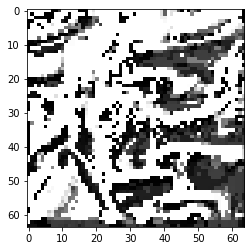

In [ ]:
plt.imshow(lbp_train[1].reshape(64,64),cmap='gray', vmin=0, vmax=255)

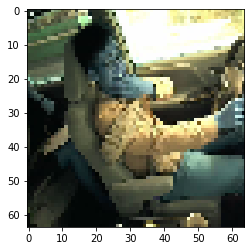

In [ ]:
plt.imshow(train_imgs[1],cmap='gray', vmin=0, vmax=255)

### SURF Features 

In [ ]:
# surf_train = get_surf(train_imgs, name='surf_train', save=True)
# surf_val = get_surf(val_imgs, name='surf_val', save=True)

In [ ]:
surf_train = load_feature('cache/surf_train.pkl')
surf_val = load_feature('cache/surf_val.pkl')
surf_train.shape

(16145, 2048)

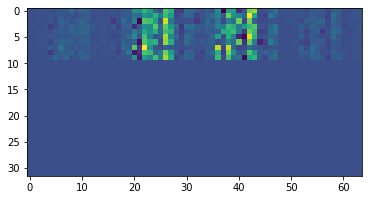

In [ ]:
plt.imshow(surf_train[1].reshape(32,64))

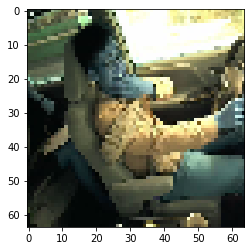

In [ ]:
plt.imshow(train_imgs[1],cmap='gray', vmin=0, vmax=255)

### RGB 

In [ ]:
# flat_rgb_train = flattened(train_imgs, None, name='flat_rgb_train', save=True)
# flat_rgb_val = flattened(val_imgs, None, name='flat_rgb_val', save=True)

In [ ]:
flat_rgb_train = load_feature('cache/flat_rgb_train.pkl')
flat_rgb_val  = load_feature('cache/flat_rgb_val.pkl')

In [ ]:
flat_rgb_train.shape , flat_rgb_val.shape 

((16145, 12288), (1794, 12288))

### Gray 

In [ ]:
# flat_gray_train = flattened(train_imgs, name='flat_gray_train', save=True)
# flat_gray_val = flattened(val_imgs, name='flat_gray_val', save=True)

In [ ]:
flat_gray_train = load_feature('cache/flat_gray_train.pkl')
flat_gray_val = load_feature('cache/flat_gray_val.pkl')

In [ ]:
flat_gray_train.shape, flat_gray_val.shape


((16145, 4096), (1794, 4096))

###Color Histogram


In [ ]:
hist_train = get_color_hist(train_imgs, name='hist_train', save=False)
hist_val = get_color_hist(val_imgs, name='hist_val', save=False)
hist_test = get_color_hist(X_test, name='hist_val', save=False)

In [ ]:
#np.save('cache/hist_test.npy', hist_test)
#np.save('cache/hist_train.npy', hist_train)
#np.save('cache/hist_val.npy', hist_val)

In [ ]:
hist_train = np.load('cache/hist_train.npy')
hist_val = np.load('cache/hist_val.npy')
hist_test = np.load('cache/hist_test.npy')

In [ ]:
hist_train.shape, hist_val.shape, hist_test.shape

((16145, 512), (1794, 512), (4485, 512))

###KAZE

In [ ]:
kaze_train = get_kaze(train_imgs, name='kaze_train', save=False)
kaze_val = get_kaze(val_imgs, name='kaze_val', save=False)
kaze_test = get_kaze(X_test, name='kaze_test', save=False)

In [ ]:
#np.save('cache/kaze_test.npy', kaze_test)
#np.save('cache/kaze_train.npy', kaze_train)
#np.save('cache/kaze_val.npy', kaze_val)

In [ ]:
kaze_train = np.load('cache/kaze_train.npy')
kaze_val = np.load('cache/kaze_val.npy')
kaze_test = np.load('cache/kaze_test.npy')

In [ ]:
kaze_train.shape, kaze_val.shape, kaze_test.shape

((16145, 2048), (1794, 2048), (4485, 2048))

## Reduce Features by PCA 

###HOG

In [ ]:
pca = PCA(n_components=100)
pca_hog_train = pca.fit_transform(norm_hog_train)
pca_hog_val = pca.transform(norm_hog_val)
# np.save('cache/pca_hog_test.npy', pca_hog_train)
# np.save('cache/pca_hog_val.npy', pca_hog_val)

### LBP Features 

In [ ]:
norm_lbp_train, norm_lbp_val = norm_features_minmax(lbp_train, lbp_val)

In [ ]:
# pca = PCA(n_components=1000)
# pca_lbp_train = pca.fit_transform(norm_lbp_train)
# pca_lbp_val = pca.transform(norm_lbp_val)

In [ ]:

# exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
# px.area(
#     x=range(1, exp_var_cumul.shape[0] + 1),
#     y=exp_var_cumul,
#     labels={"x": "# Components", "y": "Explained Variance"}
# )

In [ ]:

# pca = PCA(n_components=100)
# pca_lbp_train = pca.fit_transform(norm_lbp_train)
# pca_lbp_val = pca.transform(norm_lbp_val)

In [ ]:
# np.save('cache/pca_lbp_train.npy', pca_lbp_train)
# np.save('cache/pca_lbp_val.npy', pca_lbp_val)

In [ ]:
pca_lbp_train = np.load('cache/pca_lbp_train.npy')
pca_lbp_val = np.load('cache/pca_lbp_val.npy')

In [ ]:
print(np.shape(pca_lbp_train),np.shape(pca_lbp_val))

(16145, 100) (1794, 100)


### SURF Features

In [ ]:
norm_surf_train, norm_surf_val = norm_features_minmax(surf_train, surf_val)

In [ ]:
# pca = PCA(n_components=1000)
# pca_surf_train = pca.fit_transform(norm_surf_train)
# pca_surf_val = pca.transform(norm_surf_val)

In [ ]:

# exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
# px.area(
#     x=range(1, exp_var_cumul.shape[0] + 1),
#     y=exp_var_cumul,
#     labels={"x": "# Components", "y": "Explained Variance"}
# )

In [ ]:
# pca = PCA(n_components=100)
# pca_surf_train = pca.fit_transform(norm_surf_train)
# pca_surf_val = pca.transform(norm_surf_val)

In [ ]:
# np.save('cache/pca_surf_train.npy', pca_surf_train)
# np.save('cache/pca_surf_val.npy', pca_surf_val)

In [ ]:
pca_surf_train = np.load('cache/pca_surf_train.npy')
pca_surf_val = np.load('cache/pca_surf_val.npy')

### RGB 

In [ ]:
norm_rgb_train, norm_rgb_val = norm_features_minmax(flat_rgb_train, flat_rgb_val)

In [ ]:
# pca = PCA(n_components=1000)
# pca_rgb_train = pca.fit_transform(norm_rgb_train)
# pca_rgb_val = pca.transform(norm_rgb_val)

In [ ]:

# exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
# px.area(
#     x=range(1, exp_var_cumul.shape[0] + 1),
#     y=exp_var_cumul,
#     labels={"x": "# Components", "y": "Explained Variance"}
# )

In [ ]:
# pca = PCA(n_components=100)
# pca_rgb_train = pca.fit_transform(norm_rgb_train)
# pca_rgb_val = pca.transform(norm_rgb_val)

In [ ]:
# np.save('cache/pca_rgb_train.npy', pca_rgb_train)
# np.save('cache/pca_rgb_val.npy', pca_rgb_val)

In [ ]:
pca_rgb_train = np.load('cache/pca_rgb_train.npy')
pca_rgb_val = np.load('cache/pca_rgb_val.npy')

### Gray 

In [ ]:
norm_gray_train, norm_gray_val = norm_features_minmax(flat_gray_train, flat_gray_val)

In [ ]:
# pca = PCA(n_components=1000)
# pca_gray_train = pca.fit_transform(norm_gray_train)
# pca_gray_val = pca.transform(norm_gray_val)

In [ ]:

# exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
# px.area(
#     x=range(1, exp_var_cumul.shape[0] + 1),
#     y=exp_var_cumul,
#     labels={"x": "# Components", "y": "Explained Variance"}
# )

In [ ]:
# pca = PCA(n_components=100)
# pca_gray_train = pca.fit_transform(norm_gray_train)
# pca_gray_val = pca.transform(norm_gray_val)

In [ ]:
# np.save('cache/pca_gray_train.npy', pca_gray_train)
# np.save('cache/pca_gray_val.npy', pca_gray_val)

In [ ]:
pca_gray_train = np.load('cache/pca_gray_train.npy')
pca_gray_val = np.load('cache/pca_gray_val.npy')

###KAZE

In [ ]:
norm_kaze_train, norm_kaze_val, norm_kaze_test = norm_features_minmax2(kaze_train, kaze_val,kaze_test)

In [ ]:
norm_kaze_train.shape, norm_kaze_val.shape, norm_kaze_test.shape

In [ ]:
pca = PCA(n_components=100)
pca_kaze_train = pca.fit_transform(norm_kaze_train)
pca_kaze_val = pca.transform(norm_kaze_val)
pca_kaze_test = pca.transform(norm_kaze_test)

In [ ]:
#np.save('cache/pca_kaze_train.npy', pca_kaze_train)
#np.save('cache/pca_kaze_val.npy', pca_kaze_val)
#np.save('cache/pca_kaze_test.npy', pca_kaze_test)

In [ ]:
pca_kaze_train =np.load('cache/pca_kaze_train.npy')
pca_kaze_val = np.load('cache/pca_kaze_val.npy')
pca_kaze_test = np.load('cache/pca_kaze_test.npy')

In [ ]:
pca_kaze_train.shape, pca_kaze_val.shape, pca_kaze_test.shape

((16145, 100), (1794, 100), (4485, 100))

In [ ]:
#PCA Plot
import plotly.express as px
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

###Color Histogram

In [ ]:
norm_hist_train, norm_hist_val, norm_hist_test = norm_features_minmax2(hist_train, hist_val, hist_test)

In [ ]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=100)
pca_color_hist_train = pca_1.fit_transform(norm_hist_train)
pca_color_hist_val = pca_1.transform(norm_hist_val)
pca_color_hist_test = pca_1.transform(norm_hist_test)

In [ ]:
#np.save('cache/pca_color_hist_train.npy', pca_color_hist_train)
#np.save('cache/pca_color_hist_val.npy', pca_color_hist_val)
#np.save('cache/pca_color_hist_test.npy', pca_color_hist_test)

In [ ]:
pca_color_hist_train = np.load('cache/pca_color_hist_train.npy')
pca_color_hist_val = np.load('cache/pca_color_hist_val.npy')
pca_color_hist_test = np.load('cache/pca_color_hist_test.npy')

In [ ]:
import plotly.express as px
exp_var_cumul = np.cumsum(pca_1.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

## Reduce Features by LDA 

###HOG

In [ ]:
lda = LDA()
lda_pca_train = lda.fit_transform(norm_hog_train, train_y)
lda_pca_val = lda.transform(norm_hog_val)
# np.save('cache/lda_pca_train.npy', lda_hog_train)
# np.save('cache/lda_pca_val.npy', lda_hog_val)

### LBP Features 

In [ ]:
# lda = LDA()
# lda_lbp_train = lda.fit_transform(norm_lbp_train, train_y)
# lda_lbp_val = lda.transform(norm_lbp_val)

In [ ]:
# lda_lbp_train.shape , lda_lbp_val.shape  

((16145, 9), (1794, 9))

In [ ]:
# np.save('cache/lda_lbp_train.npy', lda_lbp_train)
# np.save('cache/lda_lbp_val.npy', lda_lbp_val)

In [ ]:
lda_lbp_train = np.load('cache/lda_lbp_train.npy')
lda_lbp_train = np.load('cache/lda_lbp_val.npy')

### SURF Features 

In [ ]:
# lda = LDA()
# lda_surf_train = lda.fit_transform(norm_surf_train, train_y)
# lda_surf_val = lda.transform(norm_surf_val)

In [ ]:
# np.save('cache/lda_surf_train.npy', lda_surf_train)
# np.save('cache/lda_surf_val.npy', lda_surf_val)

In [ ]:
lda_surf_train = np.load('cache/lda_surf_train.npy')
lda_surf_train = np.load('cache/lda_surf_val.npy')

### RGB 

In [ ]:
# lda = LDA()

# lda_rgb_train = lda.fit_transform(norm_rgb_train, train_y)
# lda_rgb_val = lda.transform(norm_rgb_val)

In [ ]:
# np.save('cache/lda_rgb_train.npy', lda_rgb_train)
# np.save('cache/lda_rgb_val.npy', lda_rgb_val)

In [ ]:
lda_rgb_train = np.load('cache/lda_rgb_train.npy')
lda_rgb_val = np.load('cache/lda_rgb_val.npy')

###Color Histogram

In [ ]:
lda = LDA()
lda_hist_train = lda.fit_transform(norm_hist_train, train_y)
lda_hist_val = lda.transform(norm_hist_val)
lda_hist_test = lda.transform(norm_hist_test)

In [ ]:
#np.save('cache/lda_hist_train.npy', lda_hist_train)
#np.save('cache/lda_hist_val.npy', lda_hist_val)
#np.save('cache/lda_hist_test.npy', lda_hist_test)

In [ ]:
lda_hist_train = np.load('cache/lda_hist_train.npy')
lda_hist_val = np.load('cache/lda_hist_val.npy')
lda_hist_test =  np.load('cache/lda_hist_test.npy')

In [ ]:
lda_hist_train.shape, lda_hist_val.shape, lda_hist_test.shape

((16145, 9), (1794, 9), (4485, 9))

###KAZE

In [ ]:
lda = LDA()
lda_kaze_train = lda.fit_transform(norm_kaze_train,train_y)
lda_kaze_val = lda.transform(norm_kaze_val)
lda_kaze_test = lda.transform(norm_kaze_test)

In [ ]:
#np.save('cache/lda_kaze_train.npy', lda_kaze_train)
#np.save('cache/lda_kaze_val.npy', lda_kaze_val)
#np.save('cache/lda_kaze_test.npy', lda_kaze_test)

In [ ]:
lda_kaze_train = np.load('cache/lda_kaze_train.npy')
lda_kaze_val = np.load('cache/lda_kaze_val.npy')
lda_kaze_test = np.load('cache/lda_kaze_test.npy')

In [ ]:
lda_kaze_train.shape, lda_kaze_val.shape, lda_kaze_test.shape

((16145, 9), (1794, 9), (4485, 9))

##Reduce Features by LDA on PCA

In [ ]:
lda = LDA()
features_train_pca = np.load('cache/features_train_pca.npy')
features_val_pca = np.load('cache/features_val_pca.npy')
lda_pca_train = lda.fit_transform(features_train_pca, train_y)
lda_pca_val = lda.transform(features_val_pca)
np.save('cache/lda_pca_train.npy', lda_pca_train)
np.save('cache/lda_pca_val.npy', lda_pca_val)

# Loading other features 

### hog 

In [ ]:
hog_train = load_feature('cache/hog_train.pkl')
hog_val = load_feature('cache/hog_val.pkl')

pca_hog_train = np.load('cache/pca_hog_train.npy')
pca_hog_val = np.load('cache/pca_hog_val.npy')

lda_hog_train = np.load('cache/lda_hog_train.npy')
lda_hog_val = np.load('cache/lda_hog_val.npy')


In [ ]:
hog_train.shape , hog_val.shape 

((16145, 2916), (1794, 2916))

In [ ]:
pca_hog_train.shape ,pca_hog_val.shape

((16145, 400), (1794, 400))

In [ ]:
lda_hog_train.shape , lda_hog_val.shape  

((16145, 9), (1794, 9))

### kaze 

In [ ]:
kaze_train = load_feature('cache/kaze_train.pkl')
kaze_val = load_feature('cache/kaze_val.pkl')

pca_kaze_train = load_feature('cache/pca_kaze_train.pkl')
pca_kaze_val = load_feature('cache/pca_kaze_val.pkl')

lda_kaze_train = load_feature('cache/lda_kaze_train.pkl')
lda_kaze_val = load_feature('cache/lda_kaze_val.pkl')


In [ ]:
kaze_train.shape , kaze_val.shape 

((16145, 2048), (1794, 2048))

In [ ]:
pca_kaze_train.shape , pca_kaze_val.shape 

((16145, 900), (1794, 900))

In [ ]:
lda_kaze_train.shape , lda_kaze_val.shape 

((16145, 9), (1794, 9))

### colour histogram

In [ ]:
hist_train = load_feature('cache/hist_train.pkl')
hist_val = load_feature('cache/hist_val.pkl')

pca_color_hist_train = load_feature('cache/pca_color_hist_train.pkl')
pca_color_hist_val = load_feature('cache/pca_color_hist_val.pkl')

lda_hist_train = load_feature('cache/lda_hist_train.pkl')
lda_hist_val = load_feature('cache/lda_hist_val.pkl')


In [ ]:
hist_train.shape , hist_val.shape 

((16145, 512), (1794, 512))

In [ ]:
pca_color_hist_train.shape , pca_color_hist_val.shape 

((16145, 100), (1794, 100))

In [ ]:
lda_hist_train.shape , lda_hist_val.shape 

((16145, 9), (1794, 9))

## Combine Features normally 

In [ ]:
# features_train = None
# features_val = None

# for t, v in zip([hog_train, hist_train, surf_train, flat_rgb_train, lbp_train, kaze_train], 
#                   [hog_val, hist_val, surf_val, flat_rgb_val, lbp_val, kaze_val]):    

#     if features_train is None:
#         features_train = t
#         features_val = v
#     else:
#         features_train = combine_features([features_train, t])
#         features_val = combine_features([features_val, v])

In [ ]:
# np.save('cache/features_train.npy', features_train)

In [ ]:
# np.save('cache/features_val.npy', features_val)

In [ ]:
# features_train =  np.load('cache/features_train.npy')
# features_val = np.load('cache/features_val.npy')

In [ ]:
# features_train.shape, features_val.shape

((16145, 23908), (1794, 23908))

## Combine Features for PCA  

In [ ]:
# features_train_pca = None
# features_val_pca = None

# for t, v in zip([pca_hog_train, pca_color_hist_train, pca_surf_train, pca_rgb_train, pca_lbp_train, pca_kaze_train], 
#                   [pca_hog_val, pca_color_hist_val, pca_surf_val, pca_rgb_val, pca_lbp_val, pca_kaze_val]):    

#     if features_train_pca is None:
#         features_train_pca = t
#         features_val_pca = v
#     else:
#         features_train_pca = combine_features([features_train_pca, t])
#         features_val_pca = combine_features([features_val_pca, v])

In [ ]:
# np.save('cache/features_train_pca.npy', features_train_pca)
# np.save('cache/features_val_pca.npy', features_val_pca)

In [ ]:
# features_train_pca = np.load('cache/features_train_pca.npy')
# features_val_pca = np.load('cache/features_val_pca.npy')

In [ ]:
# features_train_pca.shape, features_val_pca.shape

## Combine Features for LDA 

In [ ]:
# features_train_lda = None
# features_val_lda = None

# for t, v in zip([lda_hog_train, lda_hist_train, lda_surf_train, lda_rgb_train, lda_lbp_train, lda_kaze_train], 
#                   [lda_hog_val, lda_hist_val, lda_surf_val, lda_rgb_val, lda_lbp_val, lda_kaze_val]):    

#     if features_train_lda is None:
#         features_train_lda = t
#         features_val_lda = v
#     else:
#         features_train_lda = combine_features([features_train_lda, t])
#         features_val_lda = combine_features([features_val_lda, v])

In [ ]:
# np.save('cache/features_train_lda.npy', features_train_lda)
# np.save('cache/features_val_lda.npy', features_val_lda)

In [ ]:
# features_train_lda = np.load('cache/features_train_lda.npy')
# features_val_lda = np.load('cache/features_val_lda.npy')

# Test data 

In [ ]:
X_test.shape , y_test.shape 

((4485, 64, 64, 3), (4485,))

In [ ]:
# lbp_test = get_lbp(X_test, name='lbp_test', save=True)
# surf_test = get_surf(X_test, name='surf_test', save=True)


Feature saved with name cache/lbp_test.pkl
Feature saved with name cache/surf_test.pkl


In [ ]:
lbp_test = load_feature('cache/lbp_test.pkl')
surf_test = load_feature('cache/surf_test.pkl')

lbp_test.shape , surf_test.shape 

((4485, 4096), (4485, 2048))

In [ ]:
norm_lbp_train, norm_lbp_test = norm_features_minmax(lbp_train, lbp_test)

# pca = PCA(n_components=100)
# pca_lbp_train = pca.fit_transform(norm_lbp_train)
# pca_lbp_test = pca.transform(norm_lbp_test)

# np.save('cache/pca_lbp_test.npy', pca_lbp_test)

pca_lbp_test = np.load('cache/pca_lbp_test.npy')
pca_lbp_test.shape 

(4485, 100)

In [ ]:
norm_surf_train, norm_surf_test = norm_features_minmax(surf_train, surf_test)

# pca = PCA(n_components=100)
# pca_surf_train = pca.fit_transform(norm_surf_train)
# pca_surf_test = pca.transform(norm_surf_test)

# np.save('cache/pca_surf_test.npy', pca_surf_test)

pca_surf_test = np.load('cache/pca_surf_test.npy')
pca_surf_test.shape 

(4485, 100)

In [ ]:
# test_imgs = X_test
# flat_rgb_test = flattened(test_imgs, None, name='flat_rgb_test', save=True)

# flat_rgb_test = load_feature('cache/flat_rgb_test.pkl')

# norm_rgb_train, norm_rgb_test = norm_features_minmax(flat_rgb_train, flat_rgb_test)

# pca = PCA(n_components=100)
# pca_rgb_train = pca.fit_transform(norm_rgb_train)
# pca_rgb_test = pca.transform(norm_rgb_test)

# # np.save('cache/pca_rgb_train.npy', pca_rgb_train)
# np.save('cache/pca_rgb_test.npy', pca_rgb_test)


# pca_rgb_test = np.load('cache/pca_rgb_test.npy')

# flat_gray_test = flattened(test_imgs, name='flat_gray_test', save=True)

# flat_gray_test = load_feature('cache/flat_gray_test.pkl')

# norm_gray_train, norm_gray_test = norm_features_minmax(flat_gray_train, flat_gray_test)

# pca = PCA(n_components=100)
# x = pca.fit_transform(norm_gray_train)
# pca_gray_test = pca.transform(norm_gray_test)


# np.save('cache/pca_gray_test.npy', pca_gray_test)




Feature saved with name cache/flat_rgb_test.pkl
Feature saved with name cache/flat_gray_test.pkl


#Grid Search

##ADA

In [ ]:
def apply_grid_search_ADA(features_train, train_y):
    grid_params = {'n_estimators': [50, 100, 200]}
    model = AdaBoostClassifier()

    grid_object = GridSearchCV(estimator=model, param_grid=grid_params, scoring='accuracy', n_jobs=-1, refit=True,
                               verbose=3)
    grid_object.fit(features_train, train_y)
    print(grid_object.best_estimator_)
    return grid_object

##SVM

In [ ]:
def apply_grid_search_SVC(features_train, train_y):
    param_grid = {'C': [0.1, 1, 10, 100],
                  'kernel': ['rbf']}
    model = SVC()
    grid_object = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, refit=True,
                               verbose=3)
    grid_object.fit(features_train, train_y)
    print(grid_object.best_estimator_)
    return grid_object


##KNN

In [ ]:
def KNNGrid(X_train, y_train):
    classifier = KNeighborsClassifier()
    parameters = {'n_neighbors': [5, 51, 101]}
    clf = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3,
                       refit=True)
    clf.fit(X_train, y_train)
    best_accuracy = clf.best_score_
    best_parameters = clf.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return clf

##Bagging

In [ ]:
def BaggingGrid(X_train, y_train):
    classifier = BaggingClassifier(random_state=0)
    parameters = {'n_estimators': [10, 20, 40]}
    clf = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3,
                       refit=True)
    clf.fit(X_train, y_train)
    best_accuracy = clf.best_score_
    best_parameters = clf.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return clf

##Decision Tree

In [ ]:
def DTGrid(X_train, y_train):
    classifier = DecisionTreeClassifier()
    parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20]}
    clf = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3,
                       refit=True)
    clf.fit(X_train, y_train)
    best_accuracy = clf.best_score_
    best_parameters = clf.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return clf

##XgBoost

In [ ]:
def XGBGrid(X_train, y_train):
    classifier = XGBClassifier()
    parameters = {'eta': [0.3, 0.4, 0.5], 'max_depth': [6, 8, 10]}
    clf = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', n_jobs=-1, verbose=3)
    clf.fit(X_train, y_train)
    best_accuracy = clf.best_score_
    best_parameters = clf.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
    print("Best Parameters:", best_parameters)
    return clf

In [ ]:
y_train = np.load("data/train_y.npy")
y_val = np.load('data/val_y.npy')
features_train_pca = np.load('cache/features_train_pca.npy')
features_val_pca = np.load('cache/features_val_pca.npy')
features_train_lda = np.load('cache/features_train_lda.npy')
features_val_lda = np.load('cache/features_val_lda.npy')
lda_pca_train = np.load('cache/lda_pca_train.npy')
lda_pca_val = np.load('cache/lda_pca_val.npy')

# Adaboost
ada_model = apply_grid_search_ADA(features_train_pca, y_train)
pickle.dump(ada_model, open('cache/ada_lda_on_pca_model.pkl', 'wb'))
ada_model = pickle.load(open('cache/ada_lda_on_pca_model.pkl', 'rb'))
print(ada_model)

# SVM
svc_model = apply_grid_search_SVC(features_train_pca, y_train)
pickle.dump(svc_model, open('cache/svm_lda_on_pca_model.pkl', 'wb'))
svc_model = pickle.load(open('cache/svm_lda_on_pca_model.pkl', 'rb'))
print(model)

# KNN
knn_model = KNNGrid(features_train_pca, y_train)
pickle.dump(knn_model, open('cache/knn_pca_model.pkl', 'wb'))
knn_model = pickle.load(open('cache/knn_pca_model.pkl', 'rb'))
print(knn_model)

# Bagging
bag_model = BaggingGrid(features_train_pca, y_train)
pickle.dump(bag_model, open('cache/bag_pca_model.pkl', 'wb'))
bag_model = pickle.load(open('cache/bag_pca_model.pkl', 'rb'))
print(bag_model)

# Decision Tree
dt_model = DTGrid(features_train_pca, y_train)
pickle.dump(dt_model, open('cache/dt_pca_model.pkl', 'wb'))
dt_model = pickle.load(open('cache/dt_pca_model.pkl', 'rb'))
print(dt_model)

# Xgboost
xgb_model = XGBGrid(lda_pca_train, y_train)
pickle.dump(xgb_model, open('cache/xgb_pca_model.pkl', 'wb'))
xgb_model = pickle.load(open('cache/xgb_pca_model.pkl', 'rb'))
print(xgb_model)


# Model Analysis


In [ ]:
def model_analysis(model_name='DT', feature='PCA', validation=None):
    """
    Possible model names: ['SVM', 'ADA','KNN','BAG', 'XGB', 'DT']
    default = 'DT'

    Possible feature names: ['PCA','LDA','LDA_PCA']
    default = 'PCA'

    validation: (val_x, val_y) tupple for validation accuracy score.

    """
    model = None
    if model_name == 'SVM':
        if feature == 'LDA':
            model = pickle.load(open('cache_100/SVM/svm_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache_100/SVM/svm_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache_100/SVM/svm_pca_model.pkl', 'rb'))
    elif model_name == 'ADA':
        if feature == 'LDA':
            model = pickle.load(open('cache_100/adaboost/ada_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache_100/adaboost/ada_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache_100/adaboost/ada_pca_model.pkl', 'rb'))
    elif model_name == 'KNN':
        if feature == 'LDA':
            model = pickle.load(open('cache_100/KNN/knn_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache_100/KNN/knn_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache_100/KNN/knn_pca_model.pkl', 'rb'))
    elif model_name == 'BAG':
        if feature == 'LDA':
            model = pickle.load(open('cache_100/Bagging/bag_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache_100/Bagging/bag_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache_100/Bagging/bag_pca_model.pkl', 'rb'))
    elif model_name == 'XGB':
        if feature == 'LDA':
            model = pickle.load(open('cache_100/XGBoost/xgb_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache_100/XGBoost/xgb_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache_100/XGBoost/xgb_pca_model.pkl', 'rb'))
    else:
        if feature == 'LDA':
            model = pickle.load(open('cache_100/Decision Tree/dt_lda_model.pkl', 'rb'))
        elif feature == 'LDA_PCA':
            model = pickle.load(open('cache_100/Decision Tree/dt_lda_on_pca_model.pkl', 'rb'))
        else:
            model = pickle.load(open('cache_100/Decision Tree/dt_pca_model.pkl', 'rb'))

    if validation is not None:
        target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7',
                        'class 8', 'class 9', ]
        y_hat = model.predict(validation[0])
        class_report = classification_report(validation[1], y_hat, target_names=target_names, output_dict=True)
        print('Precision =', class_report['macro avg']['precision'])
        print('Recall = ', class_report['macro avg']['recall'])
        print('F1-score =', class_report['macro avg']['f1-score'])
        print('Accuracy =', class_report['accuracy'])

In [ ]:
y_train = np.load('data/train_y.npy')
y_val = np.load('data/val_y.npy')
features_train_pca = np.load('cache/features_train_pca.npy')
features_val_pca = np.load('cache/features_val_pca.npy')
features_train_lda = np.load('cache/features_train_lda.npy')
features_val_lda = np.load('cache/features_val_lda.npy')
lda_pca_train = np.load('cache/lda_pca_train.npy')
lda_pca_val = np.load('cache/lda_pca_val.npy')

# AdaBoost
model_analysis(model_name='ADA', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='ADA', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='ADA', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# SVM
model_analysis(model_name='SVM', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='SVM', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='SVM', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# KNN
model_analysis(model_name='KNN', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='KNN', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='KNN', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# Bagging
model_analysis(model_name='BAG', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='BAG', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='BAG', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# Decision Tree
model_analysis(model_name='DT', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='DT', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='DT', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# XGB
model_analysis(model_name='XGB', feature='PCA', validation=(features_val_pca, y_val))
model_analysis(model_name='XGB', feature='LDA', validation=(features_val_lda, y_val))
model_analysis(model_name='XGB', feature='LDA_PCA', validation=(lda_pca_val, y_val))

# Plots


##ROC


In [ ]:
def roc(test_y, prob):
    class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y = label_binarize(test_y, classes=class_labels)
    n_classes = y.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:, i], prob[:, i])
        roc_auc[i] = metrics.roc_auc_score(y[:, i], prob[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["avg"], tpr["avg"], _ = metrics.roc_curve(y.ravel(), prob.ravel())
    roc_auc["avg"] = metrics.auc(fpr["avg"], tpr["avg"])

    return fpr, tpr, roc_auc

## Visualization for PCA

In [ ]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
name_arr = ['ADA', 'SVM', 'KNN', 'Bagging', 'DT', 'XGB']

# Adaboost
model1 = pickle.load(open('cache/adaboost/ada_pca_model.pkl', 'rb'))
prob1 = model1.predict_proba(features_val_pca)

# SVM
model2 = pickle.load(open('cache/SVM/svm_pca_model.pkl', 'rb'))
prob2 = model2.predict_proba(features_val_pca)

# KNN
model3 = pickle.load(open('cache/KNN/knn_pca_model.pkl', 'rb'))
prob3 = model3.predict_proba(features_val_pca)

# Bagging
model4 = pickle.load(open('cache/Bagging/bag_pca_model.pkl', 'rb'))
prob4 = model4.predict_proba(features_val_pca)

# Decision Tree
model5 = pickle.load(open('cache/Decision Tree/dt_pca_model.pkl', 'rb'))
prob5 = model5.predict_proba(features_val_pca)

# Xgboost
model6 = pickle.load(open('cache/XGBoost/xgb_pca_model.pkl', 'rb'))
prob6 = model6.predict_proba(features_val_pca)

fpr1, tpr1, auc_roc1 = roc(y_val, prob1)
fpr2, tpr2, auc_roc2 = roc(y_val, prob2)
fpr3, tpr3, auc_roc3 = roc(y_val, prob3)
fpr4, tpr4, auc_roc4 = roc(y_val, prob4)
fpr5, tpr5, auc_roc5 = roc(y_val, prob5)
fpr6, tpr6, auc_roc6 = roc(y_val, prob6)

# For each class
for i in range(10):
  plt.plot(fpr1[i],tpr1[i],label='ROC curve for '+str(name_arr[0])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc1[i]))
  plt.plot(fpr2[i],tpr2[i],label='ROC curve for '+str(name_arr[1])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc2[i]))
  plt.plot(fpr3[i],tpr3[i],label='ROC curve for '+str(name_arr[2])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc3[i]))
  plt.plot(fpr4[i],tpr4[i],label='ROC curve for '+str(name_arr[3])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc4[i]))
  plt.plot(fpr5[i],tpr5[i],label='ROC curve for '+str(name_arr[4])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc5[i]))
  plt.plot(fpr6[i],tpr6[i],label='ROC curve for '+str(name_arr[5])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                ''.format(auc_roc6[i]))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

# Average ROC scores
plt.plot(fpr1["avg"], tpr1["avg"], label='ROC curve for ' + str(name_arr[0]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc1["avg"]))
plt.plot(fpr2["avg"], tpr2["avg"], label='ROC curve for ' + str(name_arr[1]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc2["avg"]))
plt.plot(fpr3["avg"], tpr3["avg"], label='ROC curve for ' + str(name_arr[2]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc3["avg"]))
plt.plot(fpr4["avg"], tpr4["avg"], label='ROC curve for ' + str(name_arr[3]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc4["avg"]))
plt.plot(fpr5["avg"], tpr5["avg"], label='ROC curve for ' + str(name_arr[4]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc5["avg"]))
plt.plot(fpr6["avg"], tpr6["avg"], label='ROC curve for ' + str(name_arr[5]) + '(area = {:.4f})'
                                                                              ''.format(auc_roc6["avg"]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

##Visualization for LDA

In [ ]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
name_arr = ['ADA', 'SVM', 'KNN', 'Bagging', 'DT', 'XGB']

# Adaboost
model1 = pickle.load(open('cache/adaboost/ada_lda_model.pkl', 'rb'))
prob1 = model1.predict_proba(features_val_lda)

# SVM
model2 = pickle.load(open('cache/SVM/svm_lda_model.pkl', 'rb'))
prob2 = model2.predict_proba(features_val_lda)

# KNN
model3 = pickle.load(open('cache/KNN/knn_lda_model.pkl', 'rb'))
prob3 = model3.predict_proba(features_val_lda)

# Bagging
model4 = pickle.load(open('cache/Bagging/bag_lda_model.pkl', 'rb'))
prob4 = model4.predict_proba(features_val_lda)

# Decision Tree
model5 = pickle.load(open('cache/Decision Tree/dt_lda_model.pkl', 'rb'))
prob5 = model5.predict_proba(features_val_lda)

# Xgboost
model6 = pickle.load(open('cache/XGBoost/xgb_lda_model.pkl', 'rb'))
prob6 = model6.predict_proba(features_val_lda)

fpr1, tpr1, auc_roc1 = roc(y_val, prob1)
fpr2, tpr2, auc_roc2 = roc(y_val, prob2)
fpr3, tpr3, auc_roc3 = roc(y_val, prob3)
fpr4, tpr4, auc_roc4 = roc(y_val, prob4)
fpr5, tpr5, auc_roc5 = roc(y_val, prob5)
fpr6, tpr6, auc_roc6 = roc(y_val, prob6)

# For each class
for i in range(10):
    plt.plot(fpr1[i],tpr1[i],label='ROC curve for '+str(name_arr[0])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                 ''.format(auc_roc1[i]))
    plt.plot(fpr2[i],tpr2[i],label='ROC curve for '+str(name_arr[1])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                 ''.format(auc_roc2[i]))
    plt.plot(fpr3[i],tpr3[i],label='ROC curve for '+str(name_arr[2])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                 ''.format(auc_roc3[i]))
    plt.plot(fpr4[i],tpr4[i],label='ROC curve for '+str(name_arr[3])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                 ''.format(auc_roc4[i]))
    plt.plot(fpr5[i],tpr5[i],label='ROC curve for '+str(name_arr[4])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                 ''.format(auc_roc5[i]))
    plt.plot(fpr6[i],tpr6[i],label='ROC curve for '+str(name_arr[5])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                 ''.format(auc_roc6[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

##Visualization for LDA on PCA

In [ ]:
class_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
name_arr = ['ADA', 'SVM', 'KNN', 'Bagging', 'DT', 'XGB']

# Adaboost
model1 = pickle.load(open('cache/adaboost/ada_lda_on_pca_model.pkl', 'rb'))
prob1 = model1.predict_proba(lda_pca_val)

# SVM
model2 = pickle.load(open('cache/SVM/svm_lda_on_pca_model.pkl', 'rb'))
prob2 = model2.predict_proba(lda_pca_val)

# KNN
model3 = pickle.load(open('cache/KNN/knn_lda_on_pca_model.pkl', 'rb'))
prob3 = model3.predict_proba(lda_pca_val)

# Bagging
model4 = pickle.load(open('cache/Bagging/bag_lda_on_pca_model.pkl', 'rb'))
prob4 = model4.predict_proba(lda_pca_val)

# Decision Tree
model5 = pickle.load(open('cache/Decision Tree/dt_lda_on_pca_model.pkl', 'rb'))
prob5 = model5.predict_proba(lda_pca_val)

# Xgboost
model6 = pickle.load(open('cache/XGBoost/xgb_lda_on_pca_model.pkl', 'rb'))
prob6 = model6.predict_proba(lda_pca_val)

fpr1, tpr1, auc_roc1 = roc(y_val, prob1)
fpr2, tpr2, auc_roc2 = roc(y_val, prob2)
fpr3, tpr3, auc_roc3 = roc(y_val, prob3)
fpr4, tpr4, auc_roc4 = roc(y_val, prob4)
fpr5, tpr5, auc_roc5 = roc(y_val, prob5)
fpr6, tpr6, auc_roc6 = roc(y_val, prob6)

# For each class
for i in range(10):
    plt.plot(fpr1[i],tpr1[i],label='ROC curve for '+str(name_arr[0])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                  ''.format(auc_roc1[i]))
    plt.plot(fpr2[i],tpr2[i],label='ROC curve for '+str(name_arr[1])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                  ''.format(auc_roc2[i]))
    plt.plot(fpr3[i],tpr3[i],label='ROC curve for '+str(name_arr[2])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                  ''.format(auc_roc3[i]))
    plt.plot(fpr4[i],tpr4[i],label='ROC curve for '+str(name_arr[3])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                  ''.format(auc_roc4[i]))
    plt.plot(fpr5[i],tpr5[i],label='ROC curve for '+str(name_arr[4])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                  ''.format(auc_roc5[i]))
    plt.plot(fpr6[i],tpr6[i],label='ROC curve for '+str(name_arr[5])+' class '+str(class_labels[i]) +  '(area = {:.4f})'
                  ''.format(auc_roc6[i]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Average ROC scores
plt.plot(fpr1["avg"], tpr1["avg"], label='ROC curve for ' + str(name_arr[0]) + '(area = {:.4f})'
                                                                                ''.format(auc_roc1["avg"]))
plt.plot(fpr2["avg"], tpr2["avg"], label='ROC curve for ' + str(name_arr[1]) + '(area = {:.4f})'
                                                                                ''.format(auc_roc2["avg"]))
plt.plot(fpr3["avg"], tpr3["avg"], label='ROC curve for ' + str(name_arr[2]) + '(area = {:.4f})'
                                                                                ''.format(auc_roc3["avg"]))
plt.plot(fpr4["avg"], tpr4["avg"], label='ROC curve for ' + str(name_arr[3]) + '(area = {:.4f})'
                                                                                ''.format(auc_roc4["avg"]))
plt.plot(fpr5["avg"], tpr5["avg"], label='ROC curve for ' + str(name_arr[4]) + '(area = {:.4f})'
                                                                                ''.format(auc_roc5["avg"]))
plt.plot(fpr6["avg"], tpr6["avg"], label='ROC curve for ' + str(name_arr[5]) + '(area = {:.4f})'
                                                                                ''.format(auc_roc6["avg"]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Testing


##Combine Test Data

In [ ]:
features_train_pca = None
features_test_pca = None
for t, v in zip([pca_hog_train, pca_color_hist_train, pca_surf_train, pca_rgb_train, pca_lbp_train, pca_kaze_train,
                  pca_gray_train], [pca_hog_test, pca_color_hist_test, pca_surf_test, pca_rgb_test, pca_lbp_test, pca_kaze_test, pca_gray_test]):

        if features_train_pca is None:
            features_train_pca = t
            features_test_pca = v
        else:
            features_train_pca = combine_features([features_train_pca, t])
            features_test_pca = combine_features([features_test_pca, v])

np.save('cache/features_test_pca.npy', features_test_pca)

##Accuracy on Best Model

In [ ]:
features_train_pca = np.load('cache/features_train_pca.npy')
features_test_pca = np.load('cache/features_test_pca.npy')
print(features_train_pca.shape, features_test_pca.shape)
comp_model = train_model(features_train_pca, y_train, model_name='SVM')
pickle.dump(comp_model, open('cache/final_model.pkl', 'wb'))
y_hat = comp_model.predict(features_test_pca)
np.save('cache/final_predictions.npy', y_hat)
acc = metrics.accuracy_score(y_test, y_hat)
print(acc)